<a href="https://colab.research.google.com/github/SahilCarterr/Autoencoders-From-Scratch/blob/main/Autoencoder_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1. Importing Modules

In [1]:
import torch
import torchvision
from torch import nn

In [2]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

#### 2. Loading the dataset

In [ ]:
tensor_transforms = transforms.ToTensor()

dataset = datasets.MNIST(root="./data",
                         download=True,
                         train=True,
                         transform=tensor_transforms)
loader = torch.utils.data.DataLoader(dataset=dataset,
                                     batch_size=32,
                                     shuffle=True)


#### 3. Device agnostic Code

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

#### 4. Creating a Autoencoder class

In [5]:
class AE(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 18),
        nn.ReLU(),
        nn.Linear(18, 9)
    )
    self.decoder = nn.Sequential(
        nn.Linear(9, 18),
        nn.ReLU(),
        nn.Linear(18, 32),
        nn.ReLU(),
        nn.Linear(32, 64),
        nn.ReLU(),
        nn.Linear(64, 128),
        nn.ReLU(),
        nn.Linear(128, 28*28),
        nn.Sigmoid()
    )
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [6]:
model = AE()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-1, weight_decay = 1e-8)

In [7]:
from tqdm.auto import tqdm

In [8]:
model.to(device)

AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=18, bias=True)
    (7): ReLU()
    (8): Linear(in_features=18, out_features=9, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=9, out_features=18, bias=True)
    (1): ReLU()
    (2): Linear(in_features=18, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=784, bias=True)
    (9): Sigmoid()
  )
)

#### 5. Training Loop

In [9]:
epochs = 20
outputs = []
losses = []
for epoch in tqdm(range(epochs)):
  for (image, _) in loader:
    image = image.reshape(-1, 28*28)
    image=image.to(device)
    reconstructed = model(image)
    loss = loss_function(reconstructed, image)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss)
  outputs.append((epoch, image, reconstructed))

  0%|          | 0/20 [00:00<?, ?it/s]

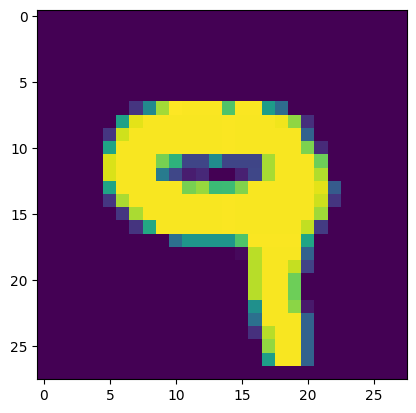

In [10]:
for i, item in enumerate(image):

  # Reshape the array for plotting
  item = item.reshape(-1, 28, 28).cpu()
  plt.imshow(item[0])

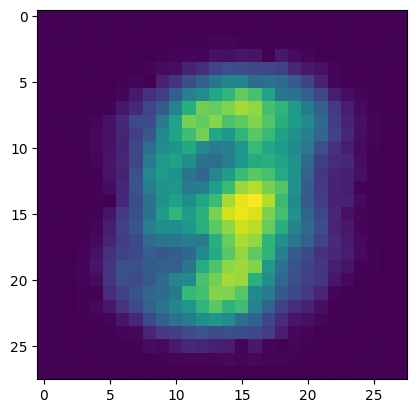

In [16]:
for i, item in enumerate(reconstructed):
  item = item.reshape(-1, 28, 28)
  item = item.detach().cpu().numpy() # Move the tensor to CPU before converting to NumPy
  plt.imshow(item[0])